In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv("Skyserver_SQL2_27_2018 6_51_39 PM.csv")
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598370,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [3]:
data.isnull().sum() 

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
data.keys()

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [6]:
data['redshift'].describe()

count    10000.000000
mean         0.143726
std          0.388774
min         -0.004136
25%          0.000081
50%          0.042591
75%          0.092579
max          5.353854
Name: redshift, dtype: float64

In [7]:
def remove_outliers(d,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return d

In [8]:
data['redshift'].describe()

count    10000.000000
mean         0.143726
std          0.388774
min         -0.004136
25%          0.000081
50%          0.042591
75%          0.092579
max          5.353854
Name: redshift, dtype: float64

<AxesSubplot:xlabel='redshift'>

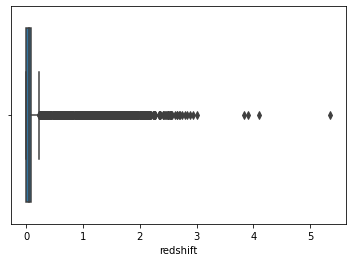

In [9]:
import seaborn as sns
sns.boxplot(x=(data['redshift']))

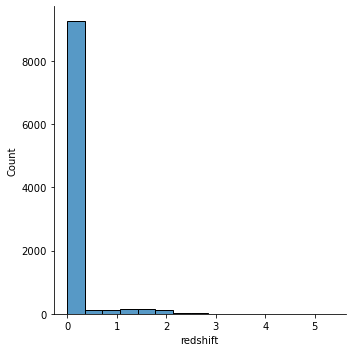

In [10]:
sns.displot(data['redshift'],bins=15,kde=False)

In [11]:
data = data.drop(columns=['objid','rerun','run','camcol'])

In [12]:
#data = data.drop(['objid', 'rerun'], axis=1)


# Separate features (X) and target variable (y)
X = data.drop('redshift', axis=1)
y = data['redshift']

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define columns by data type
numeric_features = ['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'plate', 'mjd', 'fiberid']
categorical_features = ['class']

# Create transformers for preprocessing
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(drop='first'))])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


In [13]:
from sklearn.linear_model import LinearRegression
# Create a pipeline with preprocessing and regression model
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [14]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation
mae_scores = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculate the mean MAE
mean_mae = mae_scores.mean()

print(f"Mean Absolute Error (MAE): {mean_mae}")


Mean Absolute Error (MAE): 0.08042459927158327


In [15]:
print(y_pred)

[ 0.05408062  1.28328792  0.10284197 ... -0.06069747 -0.01616939
  0.0823741 ]


In [16]:
# Perform one-hot encoding for categorical features (e.g., 'class')
data = pd.get_dummies(data, columns=['class'], drop_first=True)


In [17]:
from sklearn.tree import DecisionTreeRegressor

In [18]:
numeric_transformer = StandardScaler()
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline with preprocessing and Decision Tree Regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])
    


In [19]:
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred1= pipeline.predict(X_test)

In [20]:
print(y_pred1)

[7.485528e-02 1.919634e+00 2.078613e-02 ... 6.425060e-04 9.880000e-06
 8.485390e-02]


In [21]:
mae_scores0 = -cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculate the mean MAE
mean_mae0 = mae_scores0.mean()

print(f"Mean Absolute Error (MAE): {mean_mae0}")


Mean Absolute Error (MAE): 0.05502092219355


In [22]:
from sklearn.ensemble import RandomForestRegressor

In [23]:
pipeline1 = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Fit the pipeline to the training data
pipeline1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ra', 'dec', 'u', 'g', 'r',
                                                   'i', 'z', 'plate', 'mjd',
                                                   'fiberid']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['class'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [24]:
y_pred2 = pipeline.predict(X_test)
print(y_pred2)

[7.485528e-02 1.919634e+00 2.078613e-02 ... 6.425060e-04 9.880000e-06
 8.485390e-02]


In [25]:
mae_scores1 = -cross_val_score(pipeline1, X, y, cv=5, scoring='neg_mean_absolute_error')

# Calculate the mean MAE
mean_mae1 = mae_scores1.mean()

print(f"Mean Absolute Error (MAE): {mean_mae1}")


Mean Absolute Error (MAE): 0.043223570116682535


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
    
    # Calculate Root Mean Squared Error (RMSE)
rmse = mse**-2
    
    # Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
    
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")
print("\n")








Mean Squared Error (MSE): 0.041678026569241536
Root Mean Squared Error (RMSE): 575.6860498114113
R-squared (R2): 0.7486284416973983




<AxesSubplot:>

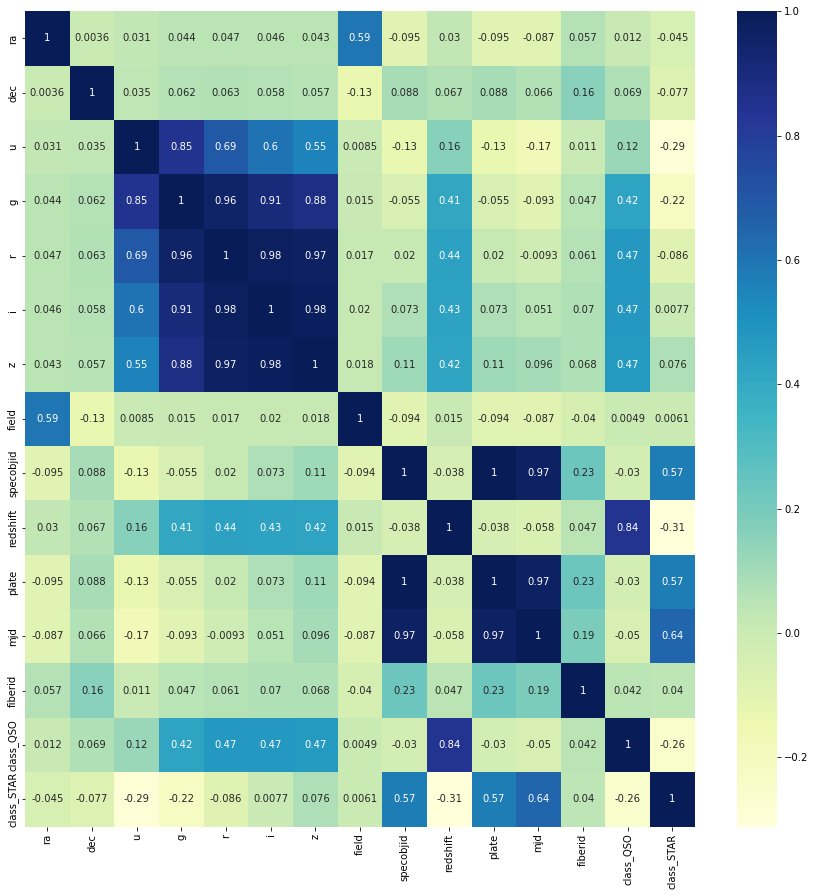

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")